chatbot for students help

In [2]:
# install important liberaries
%pip install --quiet -U langchain_google_genai langchain_core langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00


In [3]:
# save api key
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [4]:
# import chatmodel
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model = "gemini-1.5-flash",
    api_key=GEMINI_API_KEY,
    temperature=0,
)

In [7]:
# check our model is set well
response=llm.invoke('What is capital of Pakistan')

In [6]:
response.content

'The capital of Pakistan is **Islamabad**.\n'

In [8]:
# use messagestate for building of state
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

sys_msg = SystemMessage(content="You are a helpful assistant and help student to make their study plan.")

# Node
def assistant(state: MessagesState) -> MessagesState:
   return {"messages": [llm.invoke([sys_msg] + state["messages"])]}


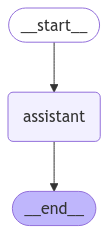

In [11]:

from langgraph.graph import START, StateGraph, END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display
# Graph
builder: StateGraph = StateGraph(MessagesState)



# Define nodes: nodes do the work
builder.add_node("assistant", assistant)

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
# Define edges: these determine how the control flow moves
builder.add_edge("assistant", END)

graph: CompiledStateGraph = builder.compile()

# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [16]:
messages = [HumanMessage(content="I am a grade 10 student, make a study plan for me")]

messages = llm.invoke(messages)

In [18]:
print(messages)

content="This study plan is designed to be flexible and adaptable to your specific needs and classes.  Remember to adjust it based on your individual workload and exam schedule.\n\n**I. Weekly Overview:**\n\n* **Sunday:** Review the week's notes and assignments. Plan for the upcoming week. Identify challenging topics.\n* **Monday - Friday:**  Follow the daily schedule below.  Allocate more time to subjects you find more difficult or have more assignments in.\n* **Saturday:**  Review the week's material. Catch up on any unfinished work.  Allow time for relaxation and extracurricular activities.\n\n\n**II. Daily Schedule (Example - Adjust to your needs):**\n\n**(This is a sample; adjust the times and subjects to fit your school schedule and personal preferences.)**\n\n| Time          | Activity                               | Subject Focus                               | Notes                                      |\n|---------------|-------------------------------------------|-----------